In [1]:
# import tensorflow as tf
# name = 'crack_segmentation_dataset/images/CFD_002.jpg'
# img = tf.io.read_file(name)
# img = tf.image.decode_png(img, channels=3)
# print(img.shape)
    

In [2]:
import tensorflow as tf
import numpy as np

IMG_SIZE=(448, 448)

def mask2rle(img):
    '''
    img: numpy array, 1 -> mask, 0 -> background
    Returns run length as string formated
    '''
    pixels= img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle2mask(mask_rle, shape=(512,512)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

def load_image_mask(img_path, mask_path):
    # Load image
    img = tf.io.read_file(img_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32) / 255.0

    # Load mask
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, IMG_SIZE, method='nearest')  # <-- Add this!
    mask = tf.cast(mask, tf.float32) / 255.0  # <-- Also normalize to [0, 1]
    
    return img, mask

2025-12-29 10:14:05.538878: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-29 10:14:05.538939: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-29 10:14:05.538957: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-29 10:14:05.544054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-29 10:14:06.332093: W tensorflow/compiler/

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

path_img = 'crack_segmentation_dataset/test/images'
path_mask = 'crack_segmentation_dataset/test/masks'

def show_pred(img_name, my_rle, c_rle):
    # idx = final_test_imgs.index(test_img_dir + "/CRACK500_20160222_165225_1281_721.jpg")
    img_path  = path_img + '/' + img_name
    mask_path = path_mask + '/' + img_name
    my_pred = rle2mask(my_rle, shape=IMG_SIZE)
    c_pred  = rle2mask(c_rle, shape=IMG_SIZE)

    img, true_mask = load_image_mask(img_path, mask_path)


    #show all 4 images
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.title('Input Image')
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(2, 2, 2)
    plt.title('True Mask')
    plt.imshow(true_mask[:,:,0], cmap='gray')
    plt.axis('off')
    plt.subplot(2, 2, 3)
    plt.title('My Prediction')
    plt.imshow(my_pred, cmap='gray')
    plt.axis('off')
    plt.subplot(2, 2, 4)
    plt.title('Comparison Model Prediction')
    plt.imshow(c_pred, cmap='gray')
    plt.axis('off')
    plt.show()

2025-12-29 10:14:07.296576: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-29 10:14:07.349703: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-29 10:14:07.349750: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-29 10:14:07.354023: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-29 10:14:07.354076: I tensorflow/compile

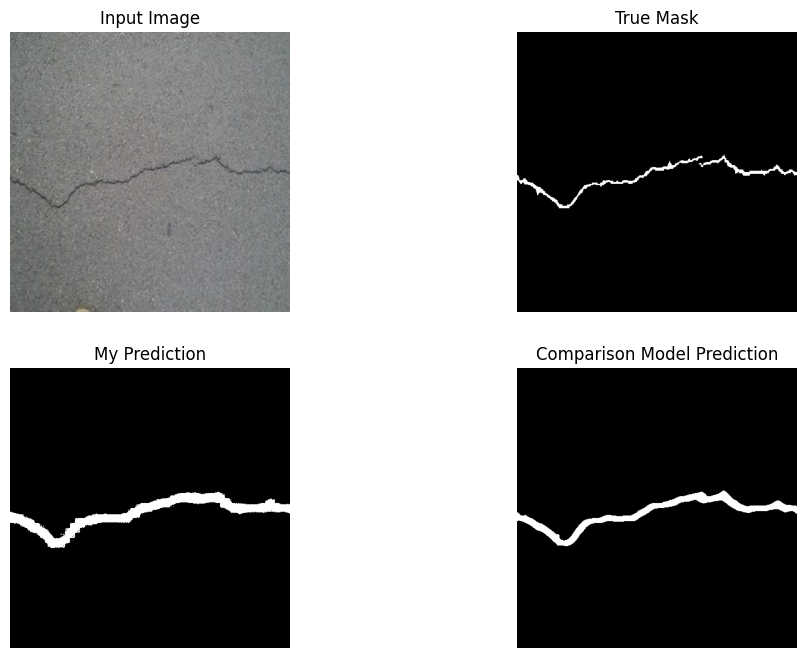

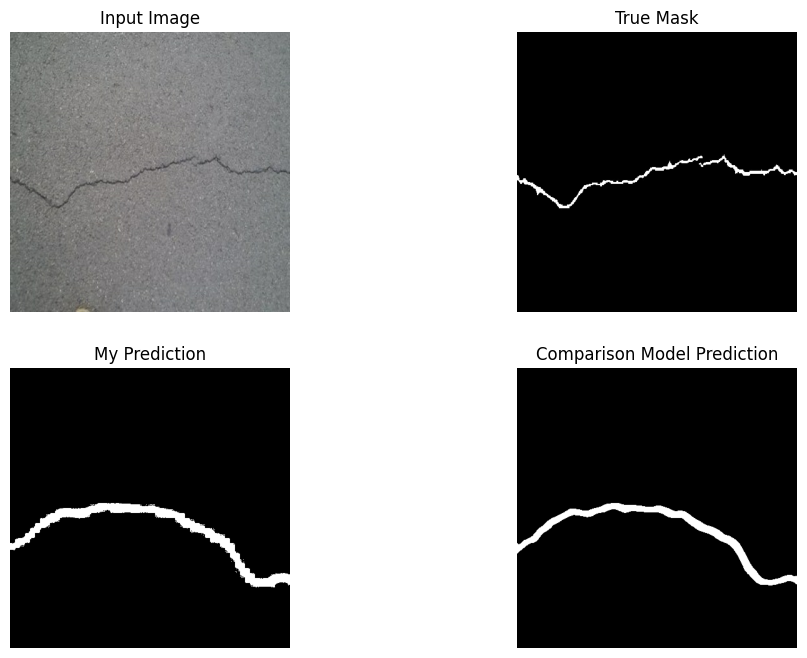

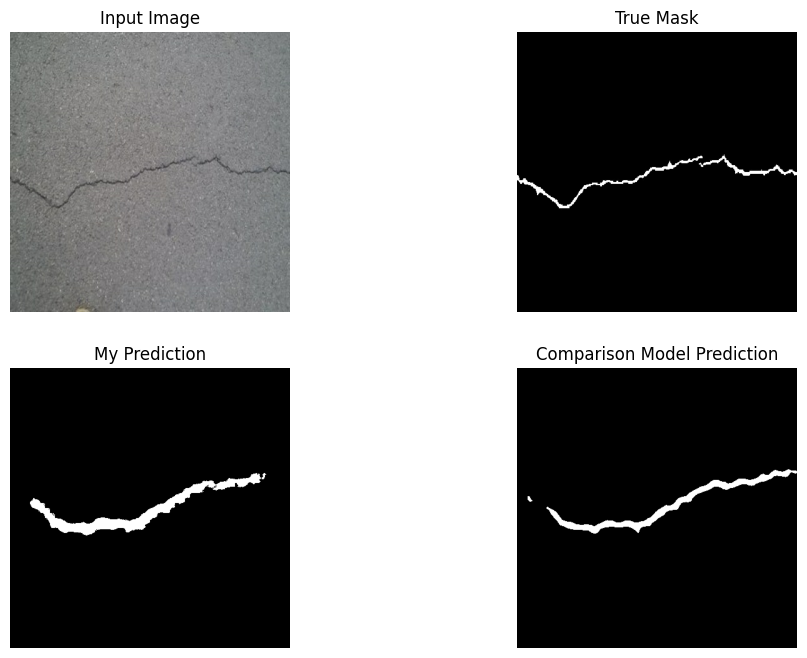

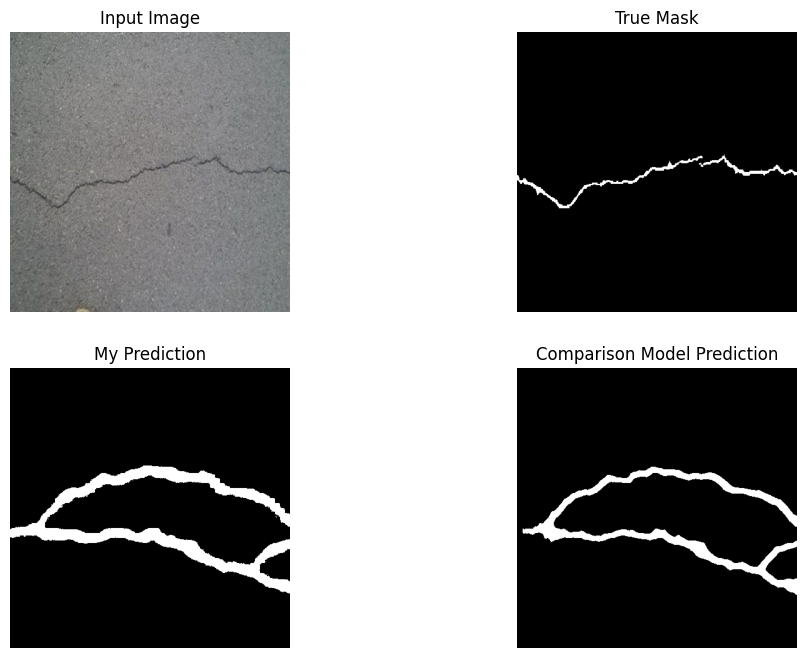

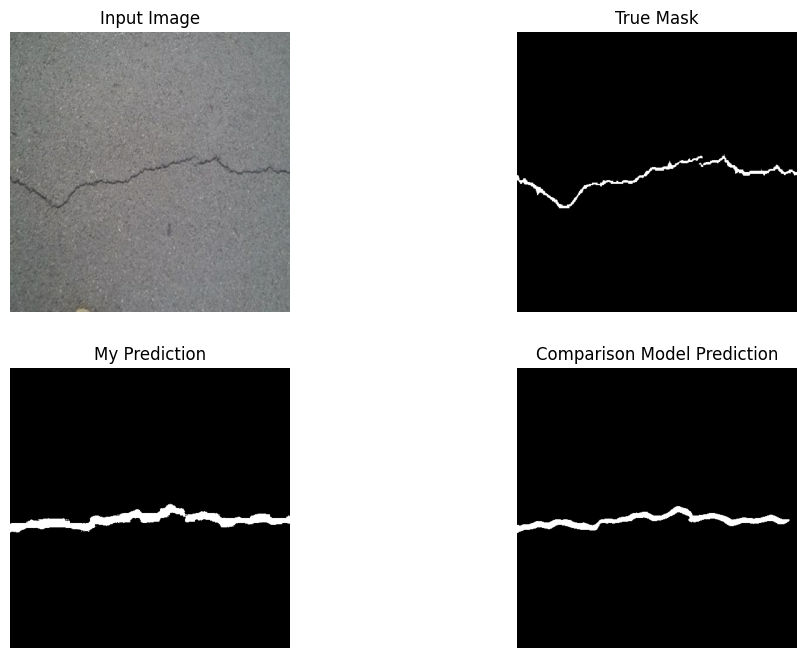

In [4]:
my_ans = dict()
cezary_ans = dict()
with open('submission.csv', 'r') as file:
    with open('submission_cezary.csv', 'r') as new_file:
        original_content = file.read()
        new_content = new_file.read()
        for line in original_content.splitlines()[1:]:
            img_id, rle = line.split(',')
            my_ans[img_id] = rle
        for line in new_content.splitlines()[1:]:
            img_id, rle = line.split(',')
            cezary_ans[img_id] = rle


for key in list(my_ans.keys())[:5]:
    show_pred(list(my_ans.keys())[0], my_ans[key], cezary_ans[key]) 
        